In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from application_logging.logger import AppLog
from utils.common import read_config
from utils.common import FileOperations
from Data_Preprocessing.preprocessing import Preprocessor
from Train_Model.trainingModel import trainModel

In [2]:
# Set the display option None, so all the dataframe column would display.
pd.set_option('display.max_columns', None)

In [3]:
# Initialize logger object to capture the log in log file
execType = 'Preprocessing'
preproclog = AppLog(execType)
log = preproclog.log("sLogger")

# Read parameter from the config.yaml
config = read_config('config.yaml')
training_file_path = config["preprocess"]["train_file_path"]

In [4]:
# Read training dataset
objTrainingFile = FileOperations(execType)
_, Raw_Training_Data = objTrainingFile.ReadCSVData(filepath=training_file_path)
Raw_Training_Data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [5]:
# Check the data type for dataframe columns
if (Raw_Training_Data.shape[1] == Raw_Training_Data.select_dtypes(include=np.number).shape[1]):
    print("All the column from dataframe is numeric data type, so no need to process for data type conversion")
    log.info("All the column from dataframe is numeric data type, so no need to process for data type conversion")

All the column from dataframe is numeric data type, so no need to process for data type conversion


### EDA on training dataset

In [6]:
#### check if dataframe has null value, then call KNN Imputer to Impute the appropriate value 
#### (Check the nearest 3 value to impute)
objPreprocess = Preprocessor(execType)
if Raw_Training_Data.isnull().values.any():
    log.info("Initiate to Impute null value for the null value columns")
    Raw_Training_Data = objPreprocess.impute_missing_values(Raw_Training_Data)
    log.info("Null value imputation done successfully")
else:
    print ("Dataset doesn't contain null value in any of the columns")
    log.info("Dataset doesn't contain null value in any of the columns")

Dataset doesn't contain null value in any of the columns


#### Check the data Embalance

In [7]:
# Check the target column category count
#Counter(Raw_Training_Data['Y']).size()
Raw_Training_Data.groupby(['Y']).size()

Y
0    2376
1    1534
dtype: int64

#### As per data embalance result, target data 0 has 60% and 1 has 40% of total target data, So we can say slightly embalanced data

In [8]:
# Describe the dataset
Raw_Training_Data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

#### As per the above dataset description, most of the column have outliers, let we see through box plot

#### Analysis the outliers via box plot

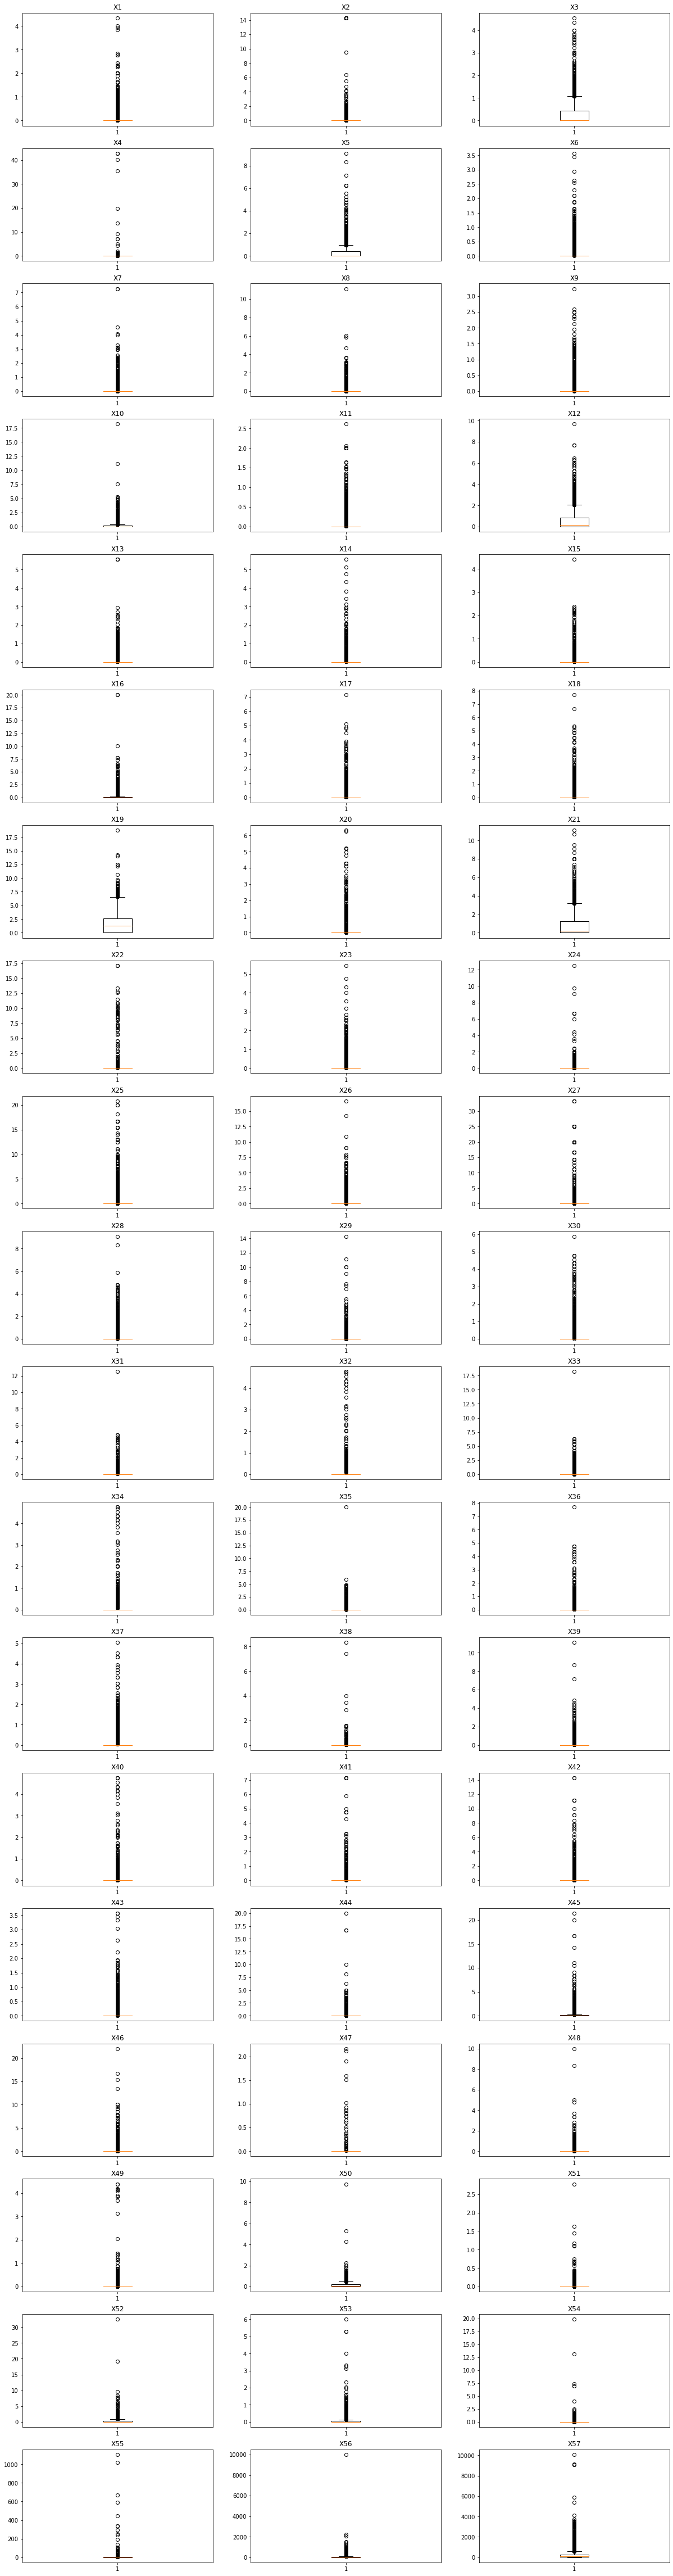

In [9]:
fig, ax = plt.subplots(19,3,figsize=(20,30))
#fig = plt.figure(figsize=(5,5))
#fig.tight_layout()
clmcnt = 0
for r in range(20):    
    for c in range(3):
        clmcnt=clmcnt+1
        if clmcnt < Raw_Training_Data.shape[1]-1:
            #print('X'+str(clmcnt))
            ax[r,c].boxplot(Raw_Training_Data['X'+str(clmcnt)])
            ax[r,c].set_title('X'+str(clmcnt))
            
#set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2.2, 
                    wspace=.2, 
                    hspace=.2) 

#### As per above box plot, We have outliers in most of the fetures, now we need to check the Multicollinearity between the independent features.
#### Multicollinearity occurs when there are two or more independent variables have a high correlation among themselves, When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable
#### Multicollinearity can be detected using Variance Inflation Factor(VIF)

In [10]:
# Get the independent feature columns
dataColumns=['X'+str(i) for i in range(1,58)]

#### Impliment Variance Inflation Factor(VIF) on scalled data

In [11]:
vif_features = objPreprocess.vif_data(Raw_Training_Data,dataColumns)
vif_features

,feature,VIF
0,X1,2.705793
1,X2,1.244962
2,X3,1.025659
3,X4,1.444831
4,X5,1.009884
5,X6,1.403621
6,X7,1.275105
7,X8,1.285639
8,X9,1.197888
9,X10,1.376754


#### As per above VIF Calculation result, X33 and X35 feature have high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before moving on to model building, else it would have risk to build a model with high multicolinearity.

In [12]:
# We would remove the X33 feature from the scalled dataset, becuse of high multicolineaty
VIF_Training_Data = Raw_Training_Data[dataColumns]
VIF_Training_Data.drop(columns=['X33'],inplace=True)
VIF_Training_Data

C:\Users\DineshNaik\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


C:\Users\DineshNaik\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


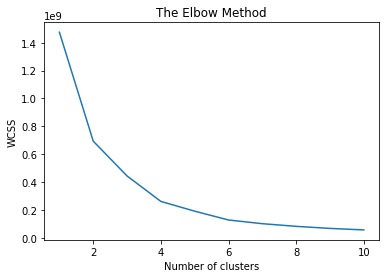

In [13]:
clustered_data, list_of_clusters = objPreprocess.clustering_kmeans(VIF_Training_Data,Raw_Training_Data.Y)

### Train the Model

#### As available data set has slightly embalanced and outliers in many features. So as per my understanding tree based model would be best to get the better performance. As per the researchers finding, embalanced data and data outlier doesn't impact much on the tree based models. So i have choosen RandomForest and xgboost algorithms to train the model for diffrent clusters. i am comparing both the model performance and choosing the best model for perticular cluster.   

In [14]:
# Initialize logger object to capture the log in log file
execType = 'Training'
traininglog = AppLog(execType)
log = traininglog.log("sLogger")

In [15]:
objTraining = trainModel(execType)
status = objTraining.trainingModel(clustered_data, list_of_clusters)
if status == 1:
    print ("Successful End of Training")
else:
    print ("Unsuccessful End of Training")

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.929, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.919, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DineshNaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.934, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.928, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.936, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.931, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.932, total=   0.4s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.932, total=   0.4s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.931, total=   0

[CV]  learning_rate=0.1, max_depth=20, n_estimators=10, score=0.906, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.932, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.930, total=   0.4s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.935, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.932, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.934, total=   1.0s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.932, tot

[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=0.901, total=   0.8s
[CV] learning_rate=0.001, max_depth=5, n_estimators=200 ..............
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=0.885, total=   0.8s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.892, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.884, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.892, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.884, total=   0.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score

[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:   55.2s finished


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.884, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.863, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.870, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.857, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.878, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.855, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.880, total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.844, total=   0.3s
[CV] criterion=gini, max_depth=2, max_features=log2, 

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=50, score=0.903, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=50, score=0.892, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.907, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.884, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.905, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.892, total=   0.3s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   11.5s finished


Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.960, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.973, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.960, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DineshNaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.973, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.960, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.973, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.960, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.973, total=   0.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.960, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  

[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.960, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=50 ................
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.966, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.967, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.973, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.967, total=   0.2s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.973, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=0.927, tot

[CV]  learning_rate=0.001, max_depth=5, n_estimators=200, score=0.926, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.927, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=0.926, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.927, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.926, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.927, total=   0.3s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, scor

[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:   21.8s finished


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.933, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.933, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.967, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.987, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.980, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.953, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.973, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.953, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=log2, 

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=50, score=0.987, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.993, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.980, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.987, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.980, total=   0.3s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=10, score=0.973, total=   0.0s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   10.0s finished


Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.889, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.889, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.889, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DineshNaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.889, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.889, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=0.889, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.889, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=0.889, total=   0.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.889, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=0.889, total=   0

[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=0.889, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.889, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=0.889, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.889, total=   0.2s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=0.889, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=0.852, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=0.889, tot

[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=0.889, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.852, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=0.889, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, score=0.852, total=   0.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, score=0.889, total=   0.2s
[CV] learning_rate=0.001, max_depth=20, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10, score=0.852, total=   0.0s
[CV] learning_rate=0.001, max_depth=20, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10, sc

[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.926, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.926, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.963, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.926, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=0.

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.926, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=0.926, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.926, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=0.926, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=10, score=0.926, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=10, score=0.926, total=   0.0s
[CV] criterion=entropy

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.4s finished


Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=1.000, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DineshNaik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=1.000, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=1.000, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=200 ................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200, score=1.000, total=   0.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10, score=1.000, total=   0

[CV]  learning_rate=0.1, max_depth=20, n_estimators=50, score=1.000, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=1.000, total=   0.2s
[CV] learning_rate=0.1, max_depth=20, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200, score=1.000, total=   0.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10, score=1.000, tot

[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=10 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10, score=1.000, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=1.000, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=50 ..............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50, score=1.000, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=1.000, total=   0.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, sco

[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=1.000, total=   0.4s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=log2, n_estimators=10, score=1.

[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=50, score=1.000, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=100, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=auto, n_estimators=130, score=1.000, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=10, score=1.000, total=   0.0s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    8.4s finished


#### Model best param, AUC-ROC and accuracy has been captured in log file "Logs/Traning/Training.log"

In [16]:
if status == 1:
    print ("Successful End of Training")
else:
    print ("Unsuccessful End of Training")

Successful End of Training
